In [4]:
import numpy as np
import pandas as pd
import warnings

In [ ]:
warnings.filterwarnings('ingnore')


In [5]:
#get data
columns_names=["user_id","item_id","rating","timestamp"]
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ml/ml-100k/u.data",sep='\t',names=columns_names)

In [6]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
df.shape

(99999, 4)

In [ ]:
df['user_id']

0        196
1        186
2         22
3        244
4        166
        ... 
99995    880
99996    716
99997    276
99998     13
99999     12
Name: user_id, Length: 100000, dtype: int64

In [ ]:
df['item_id'].nunique()

1682

In [7]:
movies_titles=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ml/ml-100k/u.item",sep="|", header=None,encoding="latin-1")

In [8]:
movies_titles.shape


(1682, 24)

In [9]:
movies_titles=movies_titles[[0,1]]

In [10]:
movies_titles.columns=['item_id','title']
movies_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [ ]:
#exploratory data analysis
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [ ]:
df

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [11]:
print(df.columns)
print(movies_titles.columns)


Index(['user_id', 'item_id', 'rating', 'timestamp'], dtype='object')
Index(['item_id', 'title'], dtype='object')


In [13]:
df=pd.merge(df,movies_titles,on='item_id')
df.tail()

,user_id,item_id,rating,timestamp,title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


In [14]:
import matplotlib.pyplot as plt

In [15]:
import seaborn as sns

In [19]:
sns.set_style('white')

TypeError: ignored

In [20]:
df.groupby('title').mean()['rating'].sort_values(ascending=False)

title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

In [22]:
df.groupby('title').count()['rating'].sort_values(ascending=False)

title
Star Wars (1977)                      583
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [24]:
ratings=pd.DataFrame(df.groupby('title').mean()['rating'])

In [25]:
ratings.head()

,rating
title,
They Made Me a Criminal (1939),5.0
Marlene Dietrich: Shadow and Light (1996),5.0
"Saint of Fort Washington, The (1993)",5.0
Someone Else's America (1995),5.0
Star Kid (1997),5.0


In [27]:
ratings['num of ratings']=pd.DataFrame(df.groupby('title').count()['rating'])

In [28]:
ratings

,rating,num of ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


In [29]:
ratings.sort_values(by='rating',ascending=False)

,rating,num of ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"I, Worst of All (Yo, la peor de todas) (1990)",1.0,1
"Woman in Question, The (1950)",1.0,1
Vermont Is For Lovers (1992),1.0,1


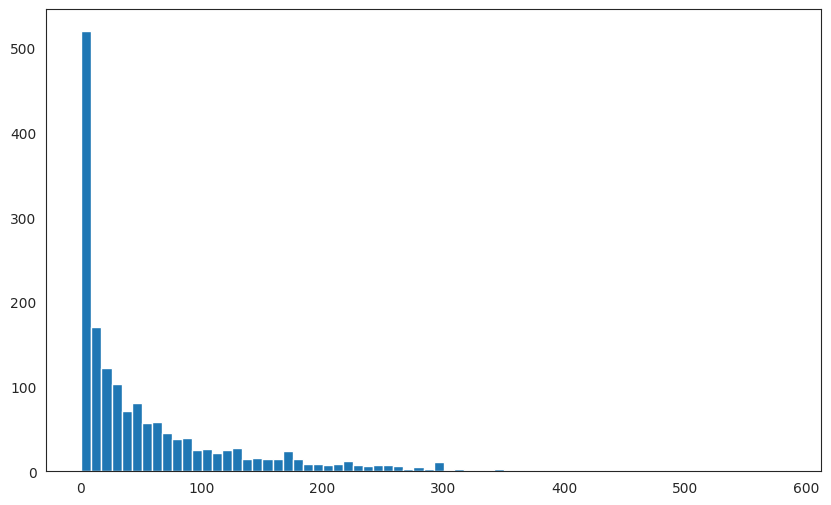

In [30]:
plt.figure(figsize=(10,6))
plt.hist(ratings['num of ratings'],bins=70)
plt.show()

(array([ 69.,   0.,   1.,   0.,   2.,   4.,   0.,   1.,  11.,   0.,   4.,
          7.,   4.,   3.,   9.,   7.,   6.,  52.,   3.,   7.,  19.,  26.,
         15.,  17.,  34.,  20.,  45.,  21.,  27.,  43.,  45.,  38.,  36.,
         32.,  12., 127.,  40.,  63.,  46.,  45.,  57.,  32.,  53.,  59.,
         42.,  49.,  52.,  36.,  45.,  45.,  35.,  35.,  64.,  24.,  27.,
         14.,  15.,  11.,   5.,   2.,   5.,   5.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,  10.]),
 array([1.        , 1.05714286, 1.11428571, 1.17142857, 1.22857143,
        1.28571429, 1.34285714, 1.4       , 1.45714286, 1.51428571,
        1.57142857, 1.62857143, 1.68571429, 1.74285714, 1.8       ,
        1.85714286, 1.91428571, 1.97142857, 2.02857143, 2.08571429,
        2.14285714, 2.2       , 2.25714286, 2.31428571, 2.37142857,
        2.42857143, 2.48571429, 2.54285714, 2.6       , 2.65714286,
        2.71428571, 2.77142857, 2.82857143, 2.88571429, 2.94285714,
        3.        , 3.05714286, 3.11428571, 3.

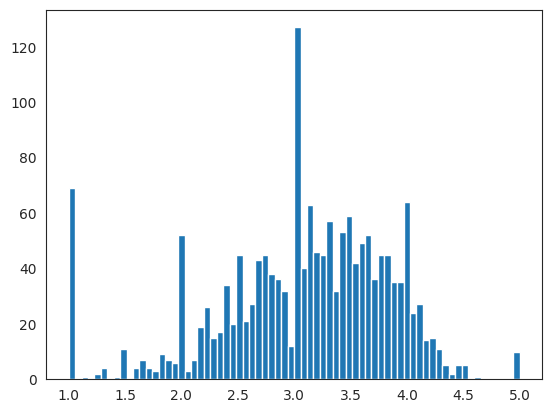

In [35]:
plt.hist(ratings['rating'],bins=70)

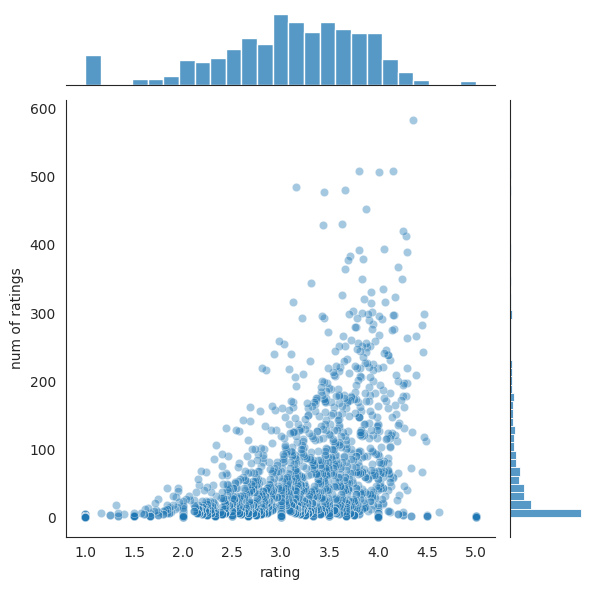

In [37]:
##join plot
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.4)

In [38]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [51]:
moviemat=df.pivot_table(index='user_id',columns='title',values='rating')
moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
ratings.sort_values('num of ratings',ascending=False).head()

,rating,num of ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [54]:
starwars_user_ratings=moviemat['Star Wars (1977)']


In [55]:
starwars_user_ratings

user_id
1      5.0
2      5.0
3      NaN
4      5.0
5      4.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 943, dtype: float64

In [59]:
Similar_to_StarWars=moviemat.corrwith(starwars_user_ratings)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [60]:
Similar_to_StarWars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [ ]:
#here NaN is that person who has not rated both movie

In [63]:
corr_of_StarWar.dropna(inplace=True)#droping the nan values

In [64]:
corr_of_StarWar=pd.DataFrame(Similar_to_StarWars,columns=["correlation"])
corr_of_StarWar

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374
Zeus and Roxanne (1997),0.818182


In [65]:
corr_of_StarWar.head()

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [66]:
corr_of_StarWar.sort_values('correlation',ascending=False).head(10)
#highly correlated movies wiht StarWArs movie

,correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [ ]:
# but there is issue is that let's say 500 people watch starwars and 5 people watch hollow reed those 5 people given to both of
# movies 5 rating than obousaly correlation will will go very high for that movie ...so we will do here so filterig like we can
# put condition "plese consider  that movie which have no of watched movies and no of r

In [68]:
cor_Starwasrs= corr_of_StarWar.join(ratings['num of ratings'])
cor_Starwasrs.head()
 #joining corrofStarwar and no of ratings

,correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [71]:
#movies which will be recommended for the Starwars
cor_Starwasrs[cor_Starwasrs['num of ratings']>100].sort_values('correlation',ascending=False)

,correlation,num of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


predict function

In [81]:
def predict_movies(Movie_name):
    movie_user_rating=moviemat[Movie_name]
    similar_to_movie=moviemat.corrwith(movie_user_rating)
    corr_movie=pd.DataFrame(similar_to_movie,columns=['correlation'])
    corr_movie.dropna(inplace=True)
    corr_movie=corr_movie.join(ratings['num of ratings'])
    predictions=corr_movie[corr_movie['num of ratings']>100].sort_values ('correlation',ascending =False)
    return predictions
    #predict funciton will take a movie as input and predict a recommended movie

In [82]:
#Now do Bhavisywadi
predictions=predict_movies("Titanic (1997)")
predictions.head()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,correlation,num of ratings
title,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208


In [83]:
# if you watched titanic than you should watch this movie also